<a href="https://colab.research.google.com/github/Birjesh786/Gym-Exercise-EDA-with-Model-GB-RF-XGB-CB-KNN-SVM-/blob/main/Gym_EXE_Model_(_GB%2C_RF%2C_XGB%2C_CB%2C_KNN%2C_SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gym Exercise Model Building

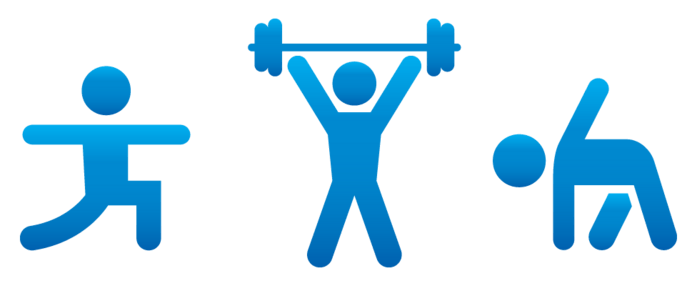

# Import necessary libraries

In [ ]:
# @title Default title text
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Load gym data

In [ ]:
gym_data = pd.read_csv('GymDataset.csv')

In [ ]:
gym_data

,Unnamed,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


## Drop unnecessary columns

In [ ]:
columns_to_drop = ['Unnamed', 'Desc', 'Rating', 'RatingDesc', 'Title']
gym_data_new = gym_data.drop(columns=columns_to_drop, axis=1)

## New Data

In [ ]:
gym_data_new

,Type,BodyPart,Equipment,Level
0,Strength,Abdominals,Bands,Intermediate
1,Strength,Abdominals,Bands,Intermediate
2,Strength,Abdominals,Bands,Intermediate
3,Strength,Abdominals,Bands,Intermediate
4,Strength,Abdominals,Bands,Intermediate
...,...,...,...,...
2913,Strength,Triceps,E-Z Curl Bar,Intermediate
2914,Strength,Triceps,E-Z Curl Bar,Beginner
2915,Strength,Triceps,E-Z Curl Bar,Intermediate
2916,Strength,Triceps,E-Z Curl Bar,Intermediate


## Basic overview of data

In [ ]:
# Listing the number of data entries for each categorical variable
cat_cols = ['Type','BodyPart','Equipment','Level']

for i in cat_cols:
    print(gym_data_new[i].value_counts())

Strength                 2545
Stretching                147
Plyometrics                97
Powerlifting               37
Cardio                     35
Olympic Weightlifting      35
Strongman                  22
Name: Type, dtype: int64
Abdominals     662
Quadriceps     646
Shoulders      340
Chest          262
Biceps         168
Triceps        151
Lats           124
Hamstrings     121
Middle Back    118
Lower Back      97
Glutes          81
Calves          47
Forearms        31
Traps           24
Abductors       21
Adductors       17
Neck             8
Name: BodyPart, dtype: int64
Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
None               32
E-Z Curl Bar       22
Foam Roll          11
Name: Equipment, dtype: int64
Intermediate    2446
Beginner         459
Expert            13
Name: Level, dtype: int64


## Prepare the features (X) and target (Y)

In [ ]:
X_ = gym_data_new.drop(['Equipment', 'BodyPart', 'Type', 'Level'], axis=1)
dms = pd.get_dummies(gym_data_new[['Equipment', 'BodyPart', 'Type']])
X = pd.concat([X_, dms], axis=1)
Y = gym_data_new['Level']

In [ ]:
X

,Equipment_Bands,Equipment_Barbell,Equipment_Body Only,Equipment_Cable,Equipment_Dumbbell,Equipment_E-Z Curl Bar,Equipment_Exercise Ball,Equipment_Foam Roll,Equipment_Kettlebells,Equipment_Machine,...,BodyPart_Shoulders,BodyPart_Traps,BodyPart_Triceps,Type_Cardio,Type_Olympic Weightlifting,Type_Plyometrics,Type_Powerlifting,Type_Strength,Type_Stretching,Type_Strongman
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2914,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2915,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2916,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
Y

0       Intermediate
1       Intermediate
2       Intermediate
3       Intermediate
4       Intermediate
            ...     
2913    Intermediate
2914        Beginner
2915    Intermediate
2916    Intermediate
2917    Intermediate
Name: Level, Length: 2918, dtype: object

## Standardize the feature data using StandardScaler

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Initialize the label encoder for the target variable


In [ ]:
label_encoder = LabelEncoder()

# Encode the target labels


In [ ]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize model names and corresponding accuracies


In [ ]:
model_names = ['Gradient Boosting', 'Random Forest', 'XGBoost', 'CatBoost', 'KNN', 'SVM']
accuracies = []

In [ ]:
# Initialize best model and best accuracy
best_model = None
best_accuracy = 0.0

# Train and evaluate each model


In [ ]:
models = [
    GradientBoostingClassifier(),
    RandomForestClassifier(random_state=42),
    XGBClassifier(),
    CatBoostClassifier(verbose=False),
    KNeighborsClassifier(n_neighbors=5),
    SVC()
]

In [ ]:
for model in models:
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    accuracies.append(accuracy)

    # Check if this model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

In [ ]:
best_model

RandomForestClassifier(random_state=42)

In [ ]:
best_accuracy

0.8708414872798435

In [ ]:
# Save the best model as a .pkl file
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

# Find the index of the best model


In [ ]:
best_model_index = accuracies.index(max(accuracies))

In [ ]:
print(best_model_index)

1


# Create a DataFrame for the data


In [ ]:
# Make sure both model_names and accuracies have the same number of elements
if len(model_names) != len(accuracies):
    raise ValueError("The number of model names and accuracies should be the same.")

In [ ]:
data = {'Model': model_names, 'Accuracy': accuracies}
df = pd.DataFrame(data)

In [ ]:
df

,Model,Accuracy
0,Gradient Boosting,0.867906
1,Random Forest,0.870841
2,XGBoost,0.868885
3,CatBoost,0.869863
4,KNN,0.830724
5,SVM,0.867906


# Visualize model accuracy


In [ ]:
fig = px.line(df, x='Model', y='Accuracy', markers=True, title='Model Accuracy Comparison')

In [ ]:
# Create a scatter plot for all models' accuracies
fig = go.Figure()

for i in range(len(model_names)):
    fig.add_trace(go.Scatter(
        x=[model_names[i]],
        y=[accuracies[i]],
        mode='markers+text',
        text=[f'Accuracy: {accuracies[i]:.2f}'],
        marker=dict(size=10),
        textposition='bottom center',
        showlegend=False
    ))

# Add an annotation for the best model's accuracy
best_model_name = model_names[best_model_index]
best_accuracy = accuracies[best_model_index]
fig.add_annotation(
    x=best_model_name,
    y=best_accuracy,
    text=f'Best Accuracy: {best_accuracy:.2f}',
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40,
    font=dict(color='white')
)

# Customize the chart layout with a black background and white text
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    xaxis_tickangle=-45
)

# Show the chart
fig.show()